In [19]:
!nvidia-smi


"nvidia-smi" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


# **Introduction to Machine Learning**
 

# TensorFlow & Keras
 
- TensorFlow is an open source machine learning library for research and production.<br>
It offers tools, libraries and resources that makes it easy for you to build and deploy ML models:
 

- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br> 


###Import TensorFlow
In this tutorial is used version 2.1.0.<br> 

In [12]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.python.client import device_lib
import time, h5py, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
 
print("TensorFlow version: {}".format(tf.__version__))

UsageError: Line magic function `%tensorflow_version` not found.


## **- Build a Single Layer Perceptron**

- Let's build a single layer perceptron composed by one dense layer, using *Tensorflow* only.

In [16]:
def one_dense_layer(x, n_in, n_out):
    # n_in: number of inputs, n_out: number of outputs
    # y = sigmoid(W*x + b)
    # W = [1,1]
    # b = 1
    W = tf.ones((n_in, n_out))
    b = tf.ones((1, n_out))
    z = tf.matmul(x,W) + b
    out = tf.sigmoid(z)
    return out

- Build the same Single Layer Perceptron with *Keras*

In [17]:
# Define the number of inputs and outputs
n_output_nodes = 2
 
# First define the model 
model = tf.keras.Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")

# Add the dense layer to the model
model.add(dense_layer)

NameError: name 'tf' is not defined

## Test the model

In [18]:
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model(x_input))

NameError: name 'tf' is not defined

### **- Build a Multilayer perceptron**


Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer. 
 
Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.



### - Model parameters
There are many parameters to choose from: the Optimizer, the Loss Function and the Metrics to use.<br>

**- Loss functions** are used to compare the network's predicted output  with the real output, in each iteration of the backpropagations algorithm; loss functions are used to tell the model how the weights should be updated.<br>
Common loss functions are: 
- 'sparse_categorical_crossentropy' (for multi object classification)
- 'binary_crossentropy' (for binary classification)
- 'mean_squared_error' (for output real)
<br><br>

**- Metrics** are used to evaluate a model; common metrics are:

- precision [TP/(TP+FP)], 
- recall [TP/(TP+FN)], 
- accuracy [(TP+TN)/(TP+FP+FN+TN)], 
- ..<br>

**- Optimizer** determines the update rules of the weights.<br>
The performance and update speed may heavily vary from optimizer to optimizer. Some optimizer are:
- Adam
- SGD
- RMSprop

In [ ]:
n_input_nodes = 100
units = 32
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(units, activation='relu', input_dim=n_input_nodes))
model.add(tf.keras.layers.Dense(units/2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Generate dummy data

data = np.random.random((1000, n_input_nodes))
labels = np.random.randint(2, size=(1000, 1))


# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.4920
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5210
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5560
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5380
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 0.5510
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5900
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5800
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5950
Epoch 11/

### **-Build a Neural Network on real data**
*  Import the dataset
*  Build a model
*  Train the model 
*  Evaluate the model

### - Import Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
 
![alt text](http://lanzarotti.di.unimi.it/images_notebook/fashion-mnist.png)


In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.3, random_state=42) # split learn in train,val

print(x_train.shape, x_val.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)


Plot some sample from the training set:

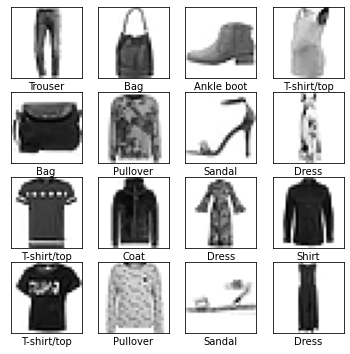

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### -Build a Model

![alt text](http://lanzarotti.di.unimi.it/images_notebook/nn.png) <br>

#### How many layers?

It depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
 

#### Which activation functions?

There exists different choices, one of the most used is Relu but it depends on the data and on the network architecture.
<br><br> 

In [ ]:
# Network Parameters
num_classes = 10 # Fashion-MNIST classes

#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [ ]:
# https://keras.io/layers/core/
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

### - Model parameters
There are many parameters to choose from: the Optimizer, the Loss Function and the Metrics to use.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm; loss functions are used to tell the model how the weights should be updated.<br>
Common loss functions are: 
- sparse_categorical_crossentropy,
- mean_squared_error
- mean_absolute_error
- categorical_crossentropy
- categorical_hinge<br><br>

**Metrics** are used to evaluate a model; common metrics are:

- precision [TP/(TP+FP)], 
- recall [TP/(TP+FN)], 
- accuracy [(TP+TN)/(TP+FP+FN+TN)], 
- ..<br>

**Optimizer** determines the update rules of the weights.<br>
The performance and update speed may heavily vary from optimizer to optimizer. Some optimizer are:
- Adam
- SGD
- RMSprop

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

### Train the model 
The **batch size** is a number of samples processed before the model is updated.<br>
The **number of epochs** is the number of complete passes through the training dataset.

In [ ]:
batch_size = 128
epochs = 50
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Epoch 1/50
329/329 [==============================] - 2s 6ms/step - loss: 0.5524 - accuracy: 0.8049 - val_loss: 0.4356 - val_accuracy: 0.8409
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8595 - val_loss: 0.3635 - val_accuracy: 0.8667
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8756 - val_loss: 0.4116 - val_accuracy: 0.8493
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3178 - accuracy: 0.8809 - val_loss: 0.3336 - val_accuracy: 0.8784
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2895 - accuracy: 0.8914 - val_loss: 0.3768 - val_accuracy: 0.8649
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2791 - accuracy: 0.8950 - val_loss: 0.3195 - val_accuracy: 0.8861
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2641 - accuracy: 0.9004 - val_loss: 0.3237 - val_accuracy: 0.8815
Epoch 

### Training history visualization

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

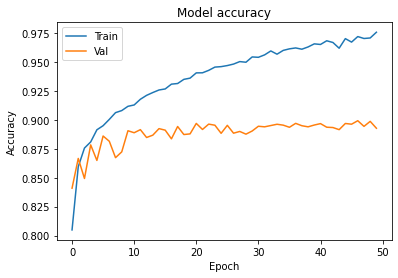

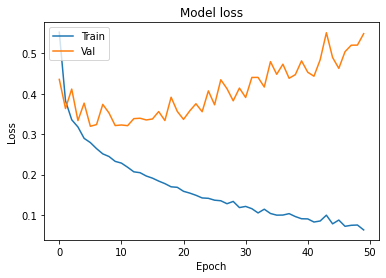

In [ ]:
plot_history(history)
 

What could you notice in the loss graph training the model over large number of epochs (50 is sufficient)?

(Training loss continue to dicrease in a flatten way until to go near 0; validation loss after a while starts to increase significantly -> OVERFITTING)

### Evaluate the model

In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.5939 - accuracy: 0.8905
Train: 0.974, Test: 0.891


**Try to play with these parameters (loss and optimizers) in order to see how this choice affects the accuracy.**
What do you expect? which is faster?

## 1.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A **"simple model"** in this context is a model where the distribution of parameter values has *less entropy* (or a model with fewer parameters altogether).<br><br>
**How to improve generalization of our model on unseen data?**<br>
There exists different methods, the most used are:<br>
    1. Dropout<br>
    2. Early stopping<br>

### 1.3.1 Dropout
Dropout (http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) is one of the most effective and most commonly used regularization techniques for neural networks.<br>
**Dropout**, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

Epoch 1/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6543 - accuracy: 0.7647 - val_loss: 0.4293 - val_accuracy: 0.8441
Epoch 2/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4628 - accuracy: 0.8302 - val_loss: 0.4079 - val_accuracy: 0.8466
Epoch 3/50
329/329 [==============================] - 3s 9ms/step - loss: 0.4208 - accuracy: 0.8450 - val_loss: 0.3784 - val_accuracy: 0.8577
Epoch 4/50
329/329 [==============================] - 3s 8ms/step - loss: 0.3976 - accuracy: 0.8540 - val_loss: 0.3503 - val_accuracy: 0.8718
Epoch 5/50
329/329 [==============================] - 2s 7ms/step - loss: 0.3771 - accuracy: 0.8573 - val_loss: 0.3511 - val_accuracy: 0.8703
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3684 - accuracy: 0.8620 - val_loss: 0.3350 - val_accuracy: 0.8781
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3576 - accuracy: 0.8657 - val_loss: 0.3249 - val_accuracy: 0.8815
Epoch 

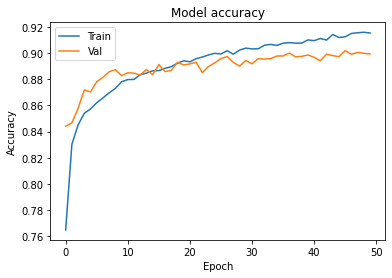

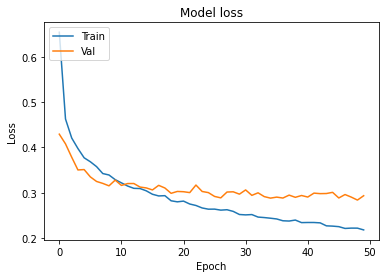

313/313 [==============================] - 1s 3ms/step - loss: 0.3253 - accuracy: 0.8916
Train: 0.941, Test: 0.892


In [ ]:
# Build the model

model_DO = tf.keras.Sequential()
model_DO.add(tf.keras.layers.Flatten())
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.1))
model_DO.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dropout(0.1))
model_DO.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_DO.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))


# Compile the model
model_DO.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# Train
epochs = 50
history = model_DO.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data =(x_val, y_val))

plot_history(history)

# Evaluate
_, train_acc = model_DO.evaluate(x_train, y_train, verbose=1)
_, test_acc = model_DO.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### 1.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>



In [ ]:
# early stopping https://keras.io/callbacks/
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "output/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)

Epoch 1/50
1300/1313 [============================>.] - ETA: 0s - loss: 0.5236 - accuracy: 0.8092
Epoch 1: saving model to output/cp.ckpt
1313/1313 [==============================] - 6s 4ms/step - loss: 0.5225 - accuracy: 0.8095 - val_loss: 0.4254 - val_accuracy: 0.8412
Epoch 2/50
1305/1313 [============================>.] - ETA: 0s - loss: 0.3857 - accuracy: 0.8566
Epoch 2: saving model to output/cp.ckpt
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3854 - accuracy: 0.8568 - val_loss: 0.3722 - val_accuracy: 0.8697
Epoch 3/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.3488 - accuracy: 0.8709
Epoch 3: saving model to output/cp.ckpt
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3488 - accuracy: 0.8709 - val_loss: 0.3633 - val_accuracy: 0.8628
Epoch 4/50
1302/1313 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8810
Epoch 4: saving model to output/cp.ckpt
1313/1313 [==============================] - 6s 4

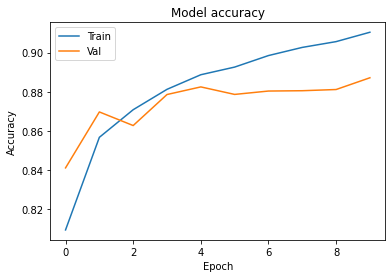

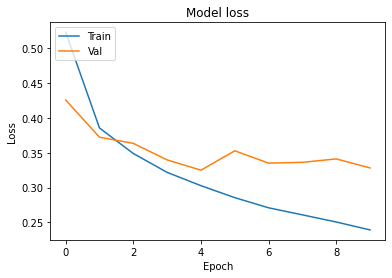

313/313 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8772
Train: 0.915, Test: 0.877


In [ ]:
# Build the model
model_ES = tf.keras.Sequential()
model_ES.add(tf.keras.layers.Flatten())
model_ES.add(tf.keras.layers.Dense(512, input_dim=(28*28), activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model_ES.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

# Compile the model
model_ES.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# Train
epochs = 50
history = model_ES.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, verbose=1, callbacks=[es,cp_callback])
# This may generate warnings related to saving the state of the optimizer.

plot_history(history)

# Evaluate
_, train_acc = model_ES.evaluate(x_train, y_train, verbose=1)
_, test_acc = model_ES.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Load weights
The saved weights can then be loaded and evaluated any time by calling the load_weights() function.


In [ ]:
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.
# link https://www.tensorflow.org/tutorials/keras/save_and_restore_models

checkpoint_path = "output/cp.ckpt"

model_ES.load_weights(checkpoint_path)

_, train_acc = model_ES.evaluate(x_train, y_train, verbose=1)
_, test_acc = model_ES.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3470 - accuracy: 0.8772
Train: 0.915, Test: 0.877
